### Visualization & explanation

We can extract some information of the graphs to visualize connections in the network and connections predicted as part of an attack.

We can also list the properties of connections that are predicted as part of an attack and related devices.

Each graph in our dataset contains 200 connections by default we can take a sub-sample of the graph by looking at the neighbours of ip-type nodes.

In [4]:
import pickle

with open('graph_val.pkl', 'rb') as f:
    data_val = pickle.load(f)

In [8]:
from torch_geometric.loader import NeighborLoader

#indexes in dataset for different scenario's
examples = {'portscan':2, 'bruteforce':1222, 'dos':2000, 'pingscan':1467}

g = data_val[examples['pingscan']]

nloader = NeighborLoader(
    data=g,
    # Sample all neighbors for each node and each edge type for 2 iterations:
    num_neighbors={('ip', 'to', 'connection'): [-1]*2 , ('connection', 'to', 'ip'): [-1]*2},
    input_nodes=('ip'),
    batch_size=100
)

sample = next(iter(nloader)).to('cpu')
sample

HeteroData(
  ip={
    x=[66, 10],
    input_id=[66],
    batch_size=66
  },
  connection={
    x=[200, 16],
    y=[200, 5]
  },
  (ip, to, connection)={ edge_index=[2, 400] },
  (connection, to, ip)={ edge_index=[2, 400] }
)

We can convert a HeteroData object to a networkx object to visualize this later.

In [10]:
from utils.graph_data import to_networkx_graph

G = to_networkx_graph(sample)
print(len(G.nodes))

266


Sample of the network is visualised below with different icons for:
- Benign connections or malicious connections.
- Internal devices or servers
- External devices

The different attacks and affected devices are also listed below. You can rerun this notebook for different scenario's.

2 connections between the office subnet (ip_45) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_46) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_47) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_48) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_49) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_50) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_51) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_53) and the developer subnet (ip_60) consists of attack_pingScan
2 connections between the office subnet (ip_54) and the developer subnet (ip_60) consists of attack_pingScan
9 connections betwe

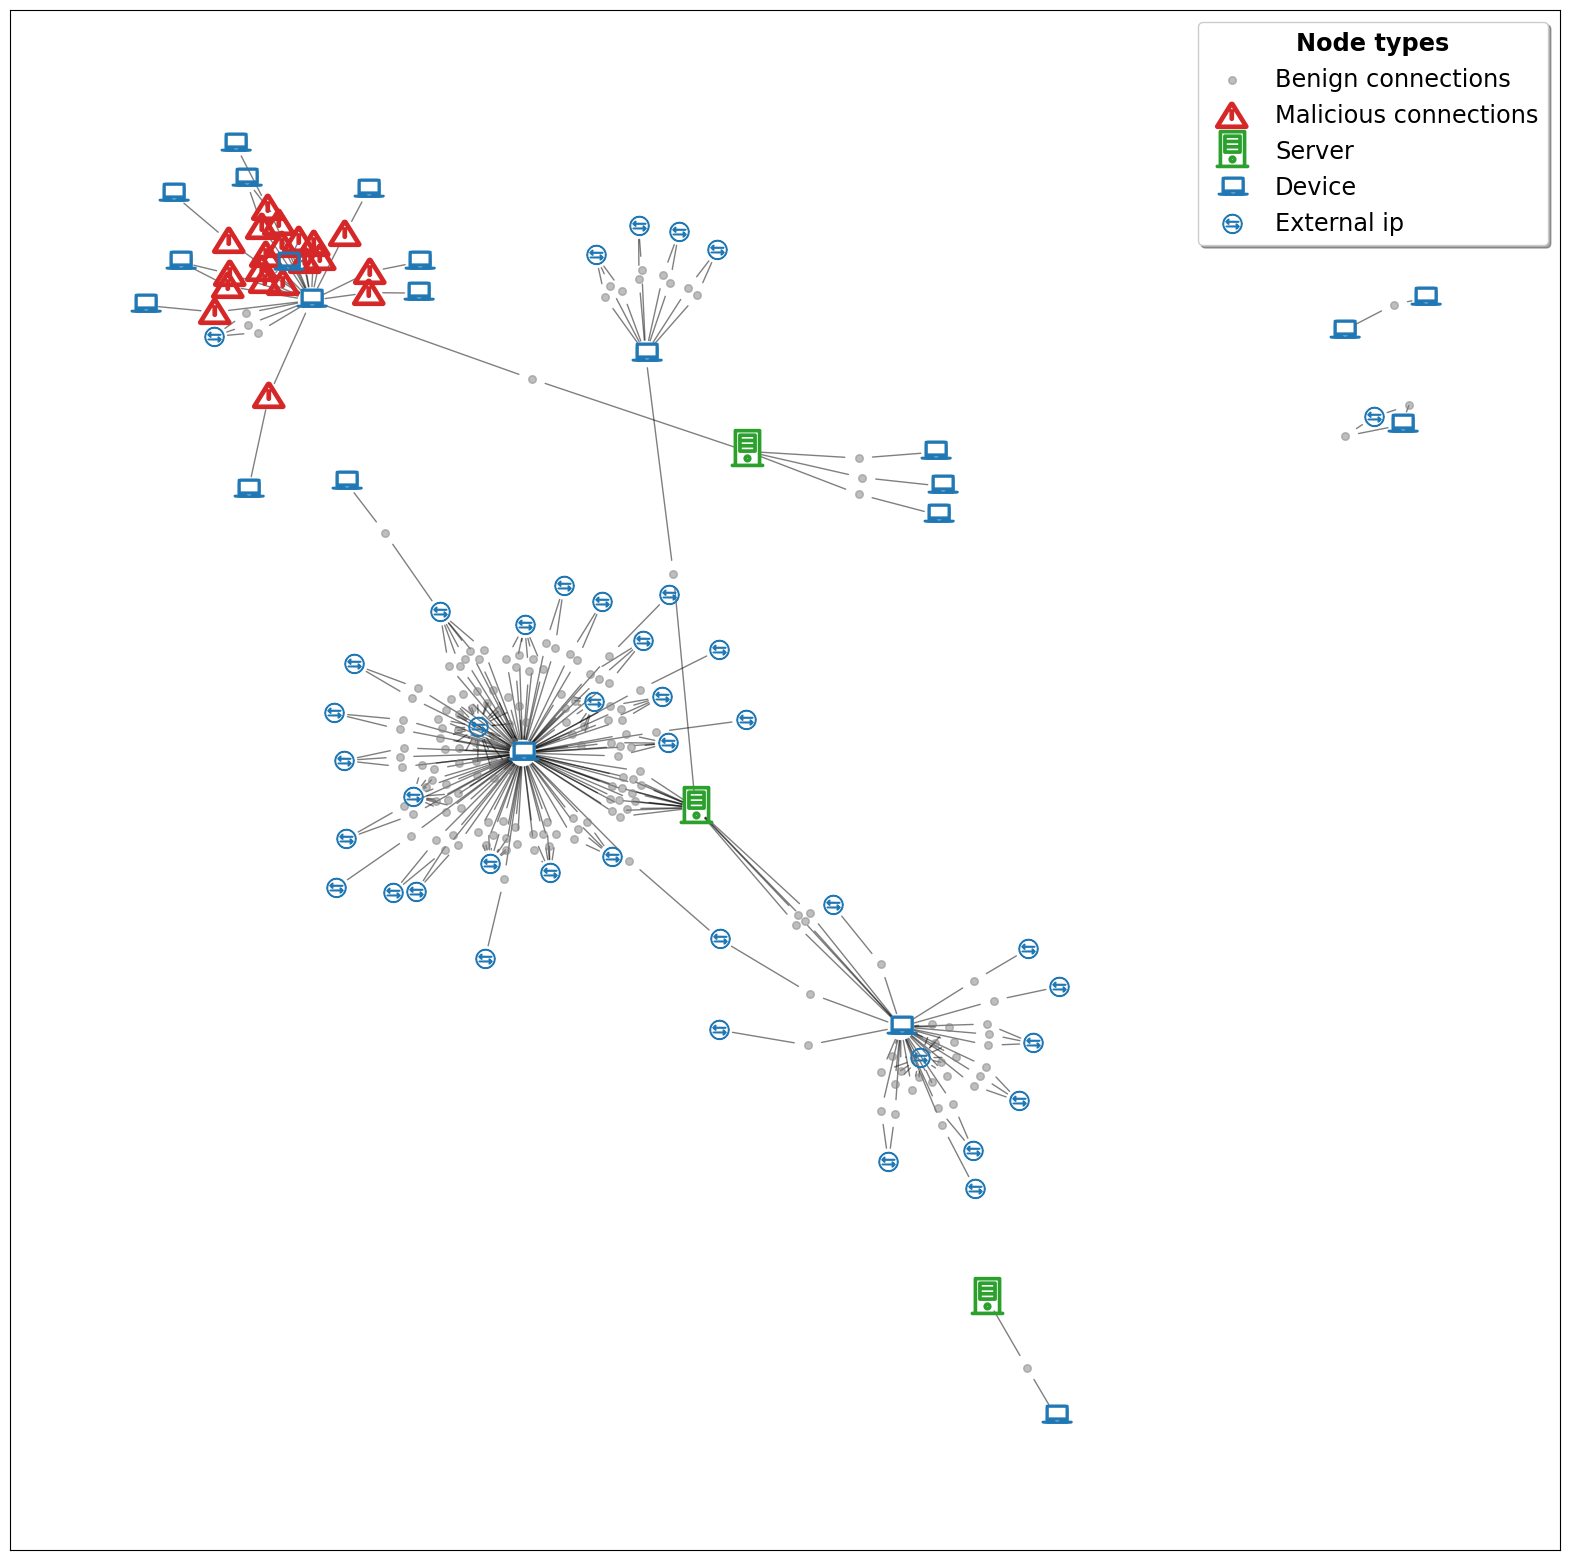

In [12]:
from utils.visualize import *
visualize_network(G, layout='spring')

We can also extract the malicious connections and the devices they talked to for an overview of attacks executed.

2 connections between the office subnet (ip_45) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_46) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_47) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_48) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_49) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_50) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_51) and the developer subnet (ip_60) consists of attack_pingScan
1 connections between the office subnet (ip_53) and the developer subnet (ip_60) consists of attack_pingScan
2 connections between the office subnet (ip_54) and the developer subnet (ip_60) consists of attack_pingScan
9 connections betwe

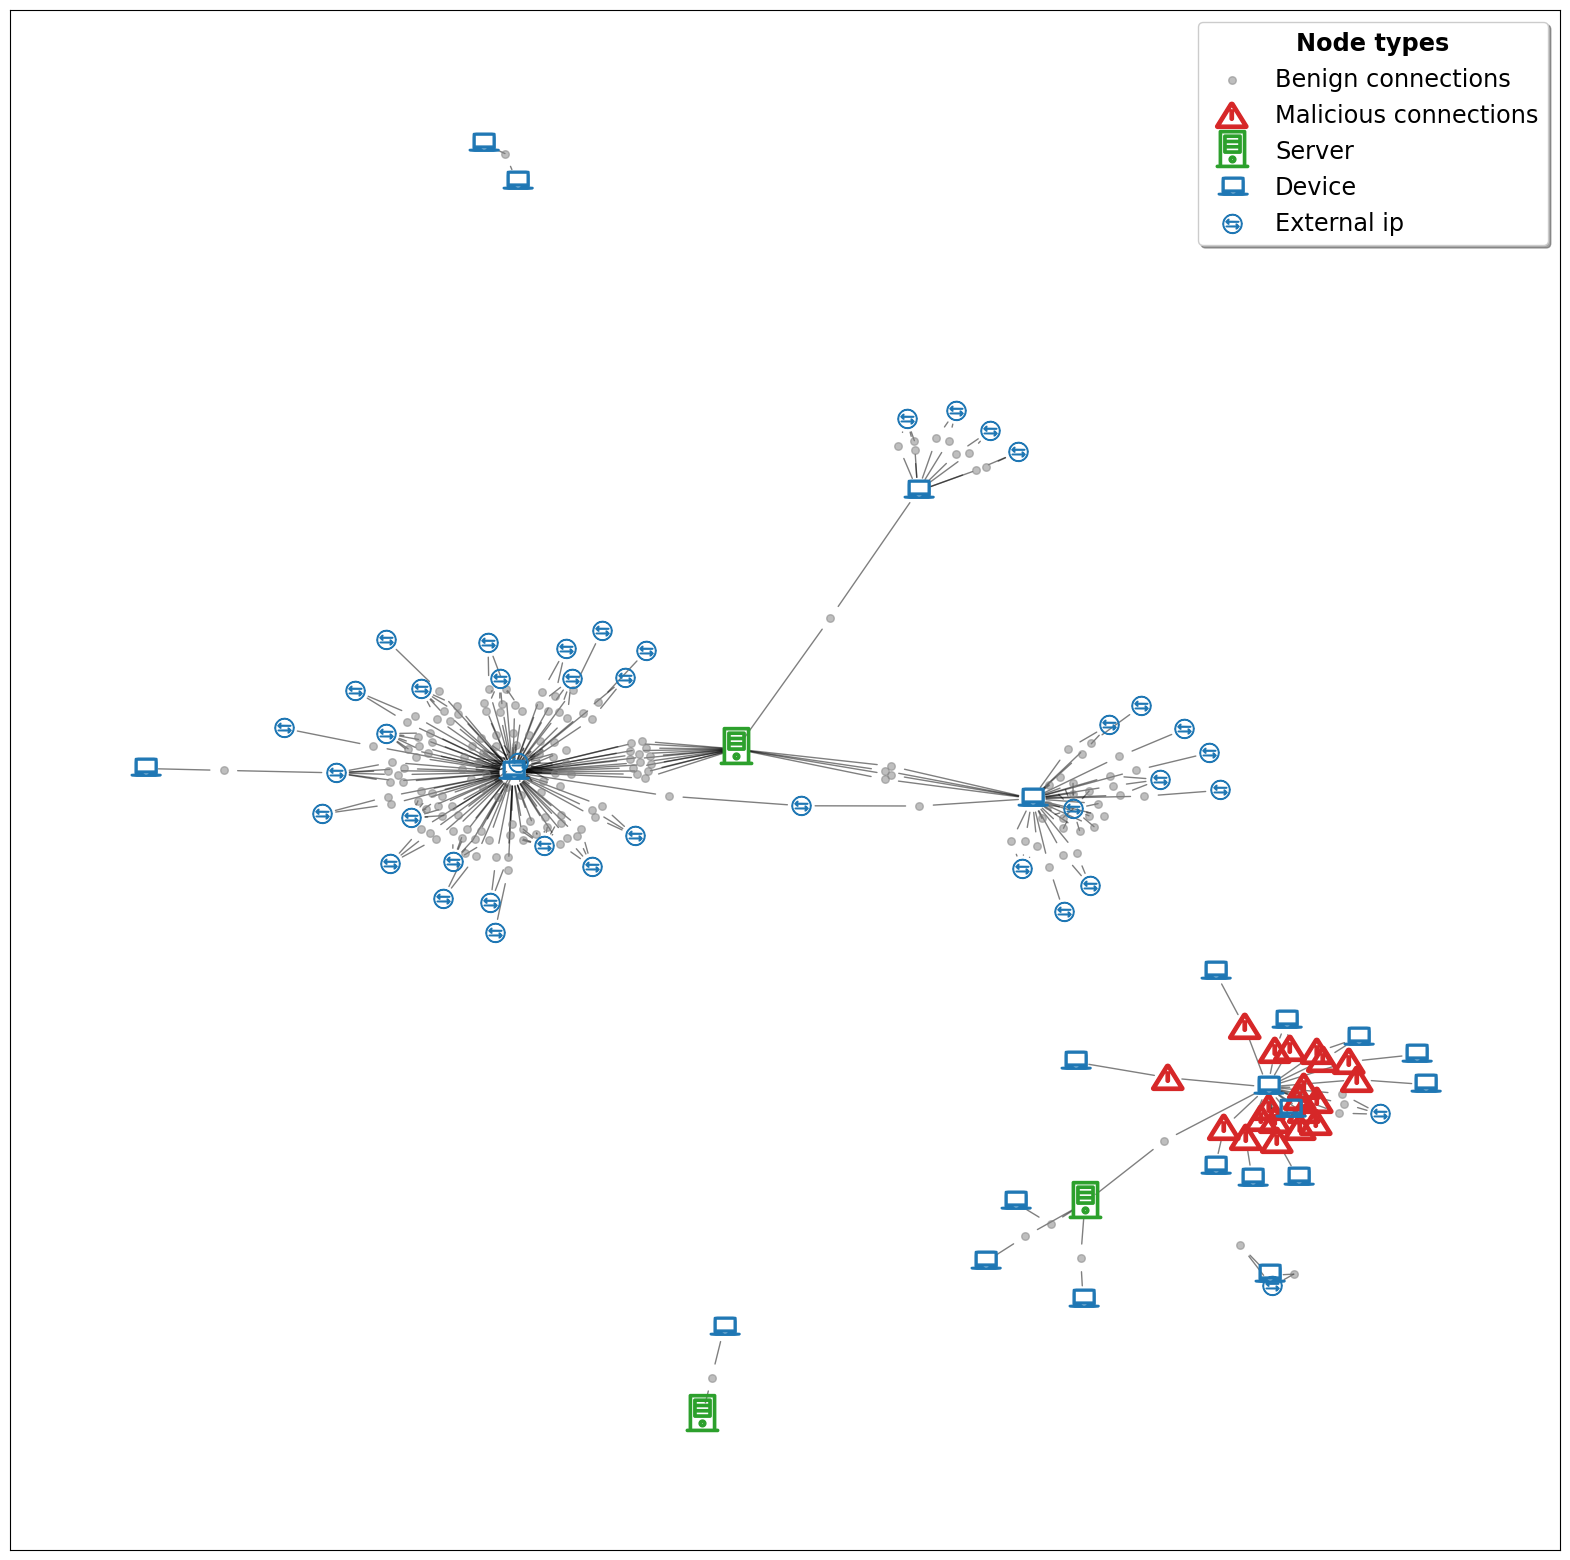

In [13]:
#or save in files
visualize_network(G, layout='spring', path_expl='explanation.txt', path_fig='network.png')